# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [3]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')
df_train.shape

(15223, 52)

In [4]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')
df_test.shape

(14910, 52)

In [5]:
df_train.head().T

,0,1,2,3,4
AGREEMENT_RK,59910150,59910230,59910525,59910803,59911781
TARGET,0,0,0,0,0
AGE,49,32,52,39,30
SOCSTATUS_WORK_FL,1,1,1,1,1
SOCSTATUS_PENS_FL,0,0,0,0,0
GENDER,1,1,1,1,0
CHILD_TOTAL,2,3,4,1,0
DEPENDANTS,1,3,0,1,0
EDUCATION,Среднее специальное,Среднее,Неполное среднее,Высшее,Среднее
MARITAL_STATUS,Состою в браке,Состою в браке,Состою в браке,Состою в браке,Состою в браке


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [6]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

df = df_test.append(df_train).reset_index(drop=True)

df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [8]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Среднее специальное', 'Среднее', 'Неполное среднее', 'Два и более высших образования', 'Высшее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Разведен(а)', 'Не состоял в браке', 'Гражданский брак', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Коммунальное хоз-во/Дорожные службы', 'Другие сферы', 'СМИ/Реклама/PR-агенства', 'Наука', 'Информационные технологии', 'Управляющая компания', 'Подбор персонала', 'Развлечения/Искусство', 'Юридические услуги/нотариальные услуги', 'Государственная служба', 'Банк/Финансы', 'Туризм', 'Информационные услуги', 'Здравоохранение', 'Торговля', 'Недвижимость', 'Металлургия/Промышленность/Машиностроение', 'Сельское хозяйство', 'Логистика', 'ЧОП/Детективная д-ть', 'Образование', 'Салоны красоты и здоровья', 'Маркетинг', 'Нефтегазовая промышленность', 'Химия/Парфюмерия/Фармацевтика', 'Ресторанный бизнес/Общественное питание', 'Страхование', 'Сборочные производства', 'Энергетика', 'Транспорт', 'Строительство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [9]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
pass

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [10]:
df_pass_columns = []
for column in df.columns:
    current_column_count = df[column].count()
    
    if current_column_count < df.shape[0]:
        df_pass_columns+=[[column, current_column_count]]
        
df_pass_columns = pd.DataFrame(df_pass_columns, columns=['column_name', 'column_value_count'])
df_pass_columns['pass_prc'] = round(100 - (df_pass_columns.column_value_count / df.shape[0]) * 100, 2)
df_pass_columns.sort_values(by='column_value_count')

,column_name,column_value_count,pass_prc
8,PREVIOUS_CARD_NUM_UTILIZED,600,98.01
7,WORK_TIME,27416,9.02
0,GEN_INDUSTRY,27420,9.00
1,GEN_TITLE,27420,9.00
2,ORG_TP_STATE,27420,9.00
4,JOB_DIR,27420,9.00
3,ORG_TP_FCAPITAL,27425,8.99
5,TP_PROVINCE,29543,1.96
6,REGION_NM,30131,0.01


**ответ (1/2)**: пропуски в данных есть (перечень выше). Для того что бы понять что с ними можно сделать добавить описание столбца и его уникальные значения

In [11]:
# полное описание солбца
dict_descr = dict(df_descr.values.tolist())
df_pass_columns['column_descr'] = df_pass_columns.column_name.map(dict_descr)
df_pass_columns.sort_values(by='column_value_count').values

array([['PREVIOUS_CARD_NUM_UTILIZED', 600, 98.01,
        'количество уже утилизированных карт ( если пусто - 0) '],
       ['WORK_TIME', 27416, 9.02,
        'время работы на текущем месте (в месяцах)'],
       ['GEN_INDUSTRY', 27420, 9.0, 'отрасль работы клиента'],
       ['GEN_TITLE', 27420, 9.0, 'должность'],
       ['ORG_TP_STATE', 27420, 9.0, 'форма собственности компании'],
       ['JOB_DIR', 27420, 9.0, 'направление деятельности в нутри компании'],
       ['ORG_TP_FCAPITAL', 27425, 8.99, 'отношение к иностранному капиталу'],
       ['TP_PROVINCE', 29543, 1.96,
        'область торговой точки, где клиент брал последний кредит'],
       ['REGION_NM', 30131, 0.01, 'регион РФ']], dtype=object)

**ответ (2/2)**: 
проанализировать сколько таких пропусков, затем что они значат, после - принять решение об удалении наблюдений с пропусками, либо их заполнении некими значениями. Например, фича **['PREVIOUS_CARD_NUM_UTILIZED']** отсутствует в 98% записей, ей можно пренебречь (удалить сам столбец). Исходя же из самого описания признака в пропусках можно проставить 0

Фичи связанные с работой **['WORK_TIME', 'JOB_DIR', 'ORG_TP_STATE', 'GEN_TITLE', 'GEN_INDUSTRY', 'ORG_TP_FCAPITAL']** имеют схожее кол-во пропусков (9%), все они связаны с работой, логично предположить, что данные пропуски свидетельствуют о том, что у человека просто нет работы, действительно если мы посмотрим датасет, у которого SOCSTATUS_WORK_FL == 0, то мы и получим наши 9% . Логично эти фичи заполнить пустыми значениями и 0 в зависимости от типа. 

Остались две фичи, **['TP_PROVINCE']** и **['REGION_NM']**. Если проанализировать зависимости между этими фичами, то мы увидим, что для a[a.REGION_NM == 'ЦЕНТРАЛЬНЫЙ ОФИС'].TP_PROVINCE кроме пропусков (544 записи) есть только значение "Москва", заполним такие пропуски "Москвой". Для df[df.REGION_NM == 'УРАЛЬСКИЙ'].TP_PROVINCE всего 46 пропущенных значений, предлагается заменить на 'NA'

In [12]:
df[df.TP_PROVINCE.isnull()].REGION_NM.value_counts()

ЦЕНТРАЛЬНЫЙ ОФИС    544
УРАЛЬСКИЙ            46
Name: REGION_NM, dtype: int64

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [13]:
columns_cat = []
for column in df_test.columns:
    if str(df_test[column].dtype) == 'object':
        columns_cat+=[[
                       column, 
                       len(df_test[column].unique()), 
                       df_test[column].unique()[:4]
                      ]]
        
pd.DataFrame(columns_cat, columns=['category_column_name', 'category_count', 'category_3_values'])

,category_column_name,category_count,category_3_values
0,EDUCATION,7,"[Среднее специальное, Среднее, Высшее, Неполно..."
1,MARITAL_STATUS,5,"[Не состоял в браке, Состою в браке, Разведен(..."
2,GEN_INDUSTRY,32,"[Образование, nan, Металлургия/Промышленность/..."
3,GEN_TITLE,13,"[Специалист, nan, Рабочий, Руководитель средне..."
4,ORG_TP_STATE,6,"[Государственная комп./учреж., nan, Частная ко..."
5,ORG_TP_FCAPITAL,3,"[Без участия, nan, С участием]"
6,JOB_DIR,11,"[Участие в основ. деятельности, nan, Вспомогат..."
7,FAMILY_INCOME,5,"[от 10000 до 20000 руб., от 20000 до 50000 руб..."
8,PERSONAL_INCOME,283,"[7000, 4100, 40000, 20000]"
9,REG_ADDRESS_PROVINCE,81,"[Красноярский край, Орловская область, Коми, Ч..."


**ответ**: да, причем изначально данные были прочитаны не совсем корректно, а именно: 5 фич - PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT распознаны как текст, фактически же они имеют float тип. Последние необходимо преобразовать в float, остальные 14 преобразовать с помощь get_dummies (OneHotEncoding)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [14]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    #Удаляло идентификатор `AGREEMENT_RK`
    df_output.drop('AGREEMENT_RK', axis=1) #AGREEMENT_RK - idшник, поэтому его удаляем
    
    # Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    cols = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for col in cols:
        df_output[col] = df_output[col].map(lambda x: x.replace(',', '.')).astype('float64')
        
    # Что-то делала с пропусками
    df_output.drop('PREVIOUS_CARD_NUM_UTILIZED', axis=1, inplace=True)
    
    df_output['JOB_DIR'].fillna(value='NA', inplace=True)
    df_output['ORG_TP_STATE'].fillna(value='NA', inplace=True)
    df_output['GEN_TITLE'].fillna(value='NA', inplace=True)
    df_output['GEN_INDUSTRY'].fillna(value='NA', inplace=True)
    df_output['ORG_TP_FCAPITAL'].fillna(value='NA', inplace=True)
    df_output['WORK_TIME'].fillna(value=0, inplace=True)
    
    df_output.loc[df_output.REGION_NM=='ЦЕНТРАЛЬНЫЙ ОФИС', 'TP_PROVINCE'] ='Москва'
    df_output.loc[df_output.REGION_NM=='УРАЛЬСКИЙ', 'TP_PROVINCE'] ='NA'
    
    #Кодировала категориальные признаки
    
    cols = ['REGION_NM', 'TP_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 
            'REG_ADDRESS_PROVINCE', 'FAMILY_INCOME', 'JOB_DIR', 'ORG_TP_FCAPITAL', 
            'ORG_TP_STATE', 'GEN_TITLE', 'GEN_INDUSTRY', 'MARITAL_STATUS', 'EDUCATION']
    
    df_output = pd.get_dummies(df_output, columns=cols)
    
    return df_output

посмотрим есть ли пропуски, и все ли заполнено

In [15]:
preproc_data(df).info(), preproc_data(df).shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 445 entries, AGREEMENT_RK to EDUCATION_Ученая степень
dtypes: float64(6), int64(32), object(1), uint8(406)
memory usage: 20.6+ MB


(None, (30133, 445))

единственный object тип - это столбец sample, с которым мы позже разберемся

In [16]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [49]:
X = df_train_preproc.drop('TARGET', axis=1)
y = df_train_preproc.TARGET

X_test_real = df_test_preproc.drop('TARGET', axis=1)
y_test_real = df_test_preproc.TARGET

#### Задание 5. Обучение и оценка качества разных моделей

In [35]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [36]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
Tree_predict = Tree.predict(X_test)
Tree_predict_broba = Tree.predict_proba(X_test)

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_predict = RF.predict(X_test)
RF_predict_broba = RF.predict_proba(X_test)

LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_predict = LR.predict(X_test)
LR_predict_broba = LR.predict_proba(X_test)

In [37]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_scores = [accuracy_score(y_test, Tree_predict),accuracy_score(y_test, RF_predict),accuracy_score(y_test, LR_predict)]
precision_scores = [precision_score(y_test, Tree_predict),precision_score(y_test, RF_predict),precision_score(y_test, LR_predict)]
recall_scores = [recall_score(y_test, Tree_predict),recall_score(y_test, RF_predict),recall_score(y_test, LR_predict)]

results = pd.DataFrame([accuracy_scores, precision_scores, recall_scores], 
                        columns=['DecisionTree', 'RandomForest', 'LogisticRegression'],
                        index=['accuracy', 'precision', 'recall'])
results  


C:\Users\1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,DecisionTree,RandomForest,LogisticRegression
accuracy,0.794832,0.876943,0.878476
precision,0.176271,0.315789,0.000000
recall,0.187387,0.010811,0.000000


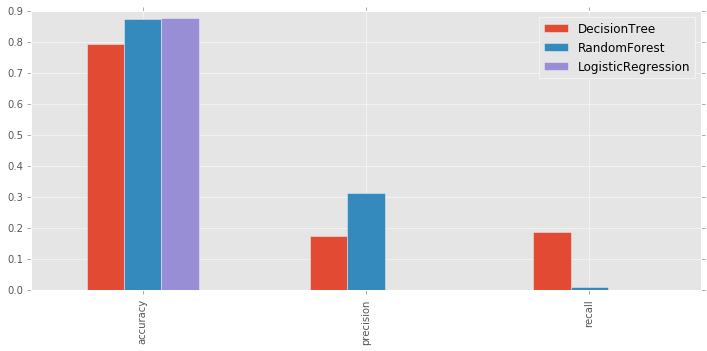

In [38]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

results.plot(kind='bar')

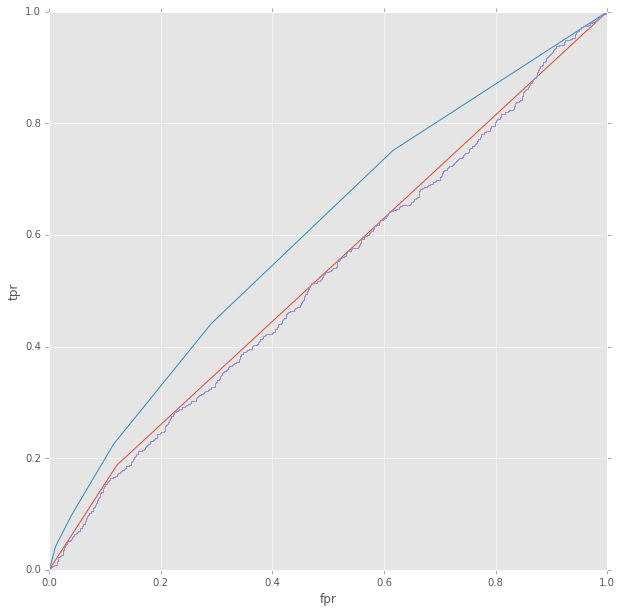

In [39]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 10))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)


fpr1, tpr1, thresholds1 = roc_curve(y_test, Tree_predict_broba[:,1])
plt.plot(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(y_test, RF_predict_broba[:,1])
plt.plot(fpr2, tpr2)

fpr3, tpr3, thresholds3 = roc_curve(y_test, LR_predict_broba[:,1])
plt.plot(fpr3, tpr3)

In [40]:
from sklearn.model_selection import cross_val_score #если импортируем cross_val_score из cross_validation будет ошибка
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

Tree_CV = cross_val_score(Tree, X, y, scoring='roc_auc', cv=cv).mean()
RF_CV = cross_val_score(RF, X, y, scoring='roc_auc', cv=cv).mean()
LR_CV = cross_val_score(LR, X, y, scoring='roc_auc', cv=cv).mean()

print('roc_auc\n')
print('DecisionTree: {:.2f}'.format(Tree_CV))
print('RandomForest: {:.2f}'.format(RF_CV))
print('LogisticRegression: {:.2f}'.format(LR_CV))

roc_auc

DecisionTree: 0.53
RandomForest: 0.59
LogisticRegression: 0.50


Видим, что RandomForest показал себя лучше других моделей, поэтому берем ее для прогнозирования реальных тестовых данных

In [66]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

RF_pred_proba_real = RF.predict_proba(df_test_preproc.drop('TARGET', axis=1))
RF_pred_proba_real 

array([[ 0.9,  0.1],
       [ 1. ,  0. ],
       [ 0.8,  0.2],
       ..., 
       [ 0.7,  0.3],
       [ 1. ,  0. ],
       [ 0.6,  0.4]])

In [67]:
# Померить roc_auc на тесте
from sklearn.metrics import roc_auc_score

roc_auc_score(df_test_preproc.TARGET, RF_pred_proba_real[:,1])

0.5959491315675205

#### Дополнительно

мы могли бы потюнить модель и получить roc_auc лучше. На данный момент, при помощи перебора циклами for получился максимальный roc_auc_score на тестовой выборке равный 66%

In [104]:
RF_tunned = RandomForestClassifier(n_estimators=20, random_state=19, max_depth=4)
RF_tunned.fit(X, y)

RF_pred_proba_real2 = RF_tunned.predict_proba(df_test_preproc.drop('TARGET', axis=1))

roc_auc_score(y, RF_tunned.predict_proba(X)[:,1]), roc_auc_score(df_test_preproc.TARGET, RF_pred_proba_real2[:,1])

(0.68460297821481264, 0.66142329570125924)